## Import Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#üìå Extrac√£o

In [3]:
# Leitura da base de dados tirado da API
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
data[1]

{'customerID': '0003-MKNFE',
 'Churn': 'No',
 'customer': {'gender': 'Male',
  'SeniorCitizen': 0,
  'Partner': 'No',
  'Dependents': 'No',
  'tenure': 9},
 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'},
 'internet': {'InternetService': 'DSL',
  'OnlineSecurity': 'No',
  'OnlineBackup': 'No',
  'DeviceProtection': 'No',
  'TechSupport': 'No',
  'StreamingTV': 'No',
  'StreamingMovies': 'Yes'},
 'account': {'Contract': 'Month-to-month',
  'PaperlessBilling': 'No',
  'PaymentMethod': 'Mailed check',
  'Charges': {'Monthly': 59.9, 'Total': '542.4'}}}

# Dicion√°rio dos dados

- customerID: n√∫mero de identifica√ß√£o √∫nico de cada cliente

- Churn: se o cliente deixou ou n√£o a empresa

- gender: g√™nero (masculino e feminino)

- SeniorCitizen: informa√ß√£o sobre um cliente ter ou n√£o idade igual ou maior que 65 anos

- Partner: se o cliente possui ou n√£o um parceiro ou parceira

- Dependents: se o cliente possui ou n√£o dependentes

- tenure: meses de contrato do cliente

- PhoneService: assinatura de servi√ßo telef√¥nico

- MultipleLines: assisnatura de mais de uma linha de telefone

- InternetService: assinatura de um provedor internet

- OnlineSecurity: assinatura adicional de seguran√ßa online

- OnlineBackup: assinatura adicional de backup online

- DeviceProtection: assinatura adicional de prote√ß√£o no
dispositivo

- TechSupport: assinatura adicional de suporte t√©cnico, menos tempo de espera

- StreamingTV: assinatura de TV a cabo

- StreamingMovies: assinatura de streaming de filmes

- Contract: tipo de contrato

- PaperlessBilling: se o cliente prefere receber online a fatura

- PaymentMethod: forma de pagamento

- Charges.Monthly: total de todos os servi√ßos do cliente por m√™s

- Charges.Total: total gasto pelo cliente

#üîß Transforma√ß√£o

In [4]:
# Normalizar os dicion√°rios aninhados
df = pd.json_normalize(data)
df.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [5]:
# Remover os prefixos, mantendo apenas o nome final
df.columns = [col.split('.')[-1] for col in df.columns]
print(df.columns)


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total'],
      dtype='object')


In [7]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

In [6]:
for col in df.columns:
    n_unique = df[col].nunique(dropna=False)
    print(f"\n Coluna: {col} ({n_unique} categorias)")
    print(df[col].unique())



 Coluna: customerID (7267 categorias)
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

 Coluna: Churn (3 categorias)
['No' 'Yes' '']

 Coluna: gender (2 categorias)
['Female' 'Male']

 Coluna: SeniorCitizen (2 categorias)
[0 1]

 Coluna: Partner (2 categorias)
['Yes' 'No']

 Coluna: Dependents (2 categorias)
['Yes' 'No']

 Coluna: tenure (73 categorias)
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

 Coluna: PhoneService (2 categorias)
['Yes' 'No']

 Coluna: MultipleLines (3 categorias)
['No' 'Yes' 'No phone service']

 Coluna: InternetService (3 categorias)
['DSL' 'Fiber optic' 'No']

 Coluna: OnlineSecurity (3 categorias)
['No' 'Yes' 'No internet service']

 Coluna: OnlineBackup (3 categorias)
['Yes' 'No' 'No internet service']

 Coluna: DeviceProtection (3 categorias)
['

## Padroniza√ß√£o

In [8]:
# Lista de colunas a padronizar
colunas_binarias = [
    'Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling','OnlineSecurity'
]

# Padronizar valores: Yes -> 1, No -> 0
df[colunas_binarias] = df[colunas_binarias].replace({'Yes': 1, 'No': 0})


In [9]:
colunas_para_null = [
    'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity'
]
coluna_null = ['MultipleLines']
df[colunas_para_null] = df[colunas_para_null].replace('No internet service', np.nan)
df[coluna_null] = df[coluna_null].replace('No phone service', np.nan)


In [10]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
      224
Name: count, dtype: int64

In [11]:
print(df['Churn'].unique())

[0 1 '']


In [12]:
df['Churn'] = df['Churn'].replace(['', ' '], np.nan)

In [13]:
df[df['Churn'].isnull()]

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
30    0047-ZHDTW    NaN  Female              0        0           0      11   
75    0120-YZLQA    NaN    Male              0        0           0      71   
96    0154-QYHJU    NaN    Male              0        0           0      29   
98    0162-RZGMZ    NaN  Female              1        0           0       5   
175   0274-VVQOQ    NaN    Male              1        1           0      65   
...          ...    ...     ...            ...      ...         ...     ...   
7158  9840-GSRFX    NaN  Female              0        0           0      14   
7180  9872-RZQQB    NaN  Female              0        1           0      49   
7211  9920-GNDMB    NaN    Male              0        0           0       9   
7239  9955-RVWSC    NaN  Female              0        1           1      67   
7247  9966-VYRTZ    NaN  Female              0        1           1      31   

      PhoneService  MultipleLines InternetService  ...  OnlineBackup  \
30               1            1.0     Fiber optic  ...           0.0   
75               1            0.0              No  ...           NaN   
96               1            0.0             DSL  ...           1.0   
98               1            0.0             DSL  ...           1.0   
175              1            1.0     Fiber optic  ...           1.0   
...            ...            ...             ...  ...           ...   
7158             1            1.0             DSL  ...           1.0   
7180             0            NaN             DSL  ...           0.0   
7211             1            1.0     Fiber optic  ...           0.0   
7239             1            0.0              No  ...           NaN   
7247             1            0.0              No  ...           NaN   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
30                 0.0          0.0          0.0              0.0   
75                 NaN          NaN          NaN              NaN   
96                 0.0          1.0          0.0              0.0   
98                 0.0          1.0          0.0              0.0   
175                1.0          0.0          1.0              1.0   
...                ...          ...          ...              ...   
7158               0.0          0.0          0.0              0.0   
7180               0.0          0.0          1.0              0.0   
7211               0.0          0.0          0.0              0.0   
7239               NaN          NaN          NaN              NaN   
7247               NaN          NaN          NaN              NaN   

            Contract PaperlessBilling              PaymentMethod Monthly  \
30    Month-to-month                1  Bank transfer (automatic)   79.00   
75          Two year                1    Credit card (automatic)   19.90   
96          One year                1           Electronic check   58.75   
98    Month-to-month                0    Credit card (automatic)   59.90   
175         One year                1  Bank transfer (automatic)  103.15   
...              ...              ...                        ...     ...   
7158        One year                1               Mailed check   54.25   
7180  Month-to-month                0  Bank transfer (automatic)   40.65   
7211  Month-to-month                1           Electronic check   76.25   
7239        Two year                1  Bank transfer (automatic)   19.25   
7247  Month-to-month                1               Mailed check   19.55   

        Total  
30      929.3  
75     1355.1  
96     1696.2  
98     287.85  
175   6792.45  
...       ...  
7158    773.2  
7180  2070.75  
7211   684.85  
7239   1372.9  
7247   658.95  

[224 rows x 21 columns]

In [15]:
#excluir casos em que Churn √© nan e reset index

df = df.dropna(subset=['Churn']).reset_index(drop=True)
print(df[df['Churn'].isnull()])

Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Monthly, Total]
Index: []

[0 rows x 21 columns]


## An√°lise da base de dados

In [16]:
# 1. Tamanho do dataset
print(f"\n Formato da base: {df.shape[0]} linhas e {df.shape[1]} colunas")


 Formato da base: 7043 linhas e 21 colunas


In [17]:
# 2. Valores ausentes
print("\n Valores ausentes por coluna:")
print(df.isnull().sum())
# N√£o tem valores ausentes


 Valores ausentes por coluna:
customerID             0
Churn                  0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        682
InternetService        0
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
Contract               0
PaperlessBilling       0
PaymentMethod          0
Monthly                0
Total                  0
dtype: int64


In [18]:
# 3. Duplicatas
duplicados = df.duplicated().sum()
print(f"\n Registros duplicados: {duplicados}")
# N√£o tem valores duplicados


 Registros duplicados: 0


In [19]:
# 4. Tipos de dados
print("\n Tipos de dados por coluna:")
print(df.dtypes)


 Tipos de dados por coluna:
customerID           object
Churn               float64
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines       float64
InternetService      object
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
Monthly             float64
Total                object
dtype: object


In [20]:
#Transformar as colunas num√©ricas para num√©ricas
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Monthly'] = pd.to_numeric(df['Monthly'], errors='coerce')

In [21]:
df['Churn'] = df['Churn'].astype('Int64')
df['MultipleLines'] = df['MultipleLines'].astype('Int64')
df['OnlineSecurity'] = df['OnlineSecurity'].astype('Int64')
df['OnlineBackup'] = df['OnlineBackup'].astype('Int64')
df['DeviceProtection'] = df['DeviceProtection'].astype('Int64')
df['TechSupport'] = df['TechSupport'].astype('Int64')
df['StreamingTV'] = df['StreamingTV'].astype('Int64')
df['StreamingMovies'] = df['StreamingMovies'].astype('Int64')
df['PaperlessBilling'] = df['PaperlessBilling'].astype('Int64')

In [22]:
# Dicion√°rio de mapeamento para traduzir os nomes das colunas
traducao_colunas = {
    'customerID': 'id_cliente',
    'Churn': 'churn',
    'gender': 'genero',
    'SeniorCitizen': 'cidadao_senior',
    'Partner': 'parceiro',
    'Dependents': 'dependentes',
    'tenure': 'tempo_de_contrato',
    'PhoneService': 'servico_telefone',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'servico_internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_filmes',
    'Contract': 'contrato',
    'PaperlessBilling': 'fatura_sem_papel',
    'PaymentMethod': 'metodo_pagamento',
    'Monthly': 'total_servicos_mes',
    'Total': 'total_gasto'

}

# Renomear as colunas
df = df.rename(columns=traducao_colunas)

#üìä Carga e an√°lise

## Explorat√≥ria dos dados

In [23]:
# Ver resumo estat√≠stico das vari√°veis num√©ricas
df[['tempo_de_contrato', 'total_servicos_mes', 'total_gasto']].describe()

tempo_de_contrato  total_servicos_mes  total_gasto
count        7043.000000         7043.000000  7032.000000
mean           32.371149           64.761692  2283.300441
std            24.559481           30.090047  2266.771362
min             0.000000           18.250000    18.800000
25%             9.000000           35.500000   401.450000
50%            29.000000           70.350000  1397.475000
75%            55.000000           89.850000  3794.737500
max            72.000000          118.750000  8684.800000

In [24]:
categoricas = [
    'churn', 'genero', 'cidadao_senior', 'parceiro', 'dependentes',
    'servico_telefone', 'multiplas_linhas', 'servico_internet',
    'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
    'streaming_tv', 'streaming_filmes', 'contrato', 'fatura_sem_papel',
    'metodo_pagamento'
]

for col in categoricas:
    print(f"\nüìå Coluna: {col}")
    print("Porcentagem:")
    print(df[col].value_counts(normalize=True, dropna=False).mul(100).round(2).astype(str) + '%')


üìå Coluna: churn
Porcentagem:
churn
0    73.46%
1    26.54%
Name: proportion, dtype: object

üìå Coluna: genero
Porcentagem:
genero
Male      50.48%
Female    49.52%
Name: proportion, dtype: object

üìå Coluna: cidadao_senior
Porcentagem:
cidadao_senior
0    83.79%
1    16.21%
Name: proportion, dtype: object

üìå Coluna: parceiro
Porcentagem:
parceiro
0    51.7%
1    48.3%
Name: proportion, dtype: object

üìå Coluna: dependentes
Porcentagem:
dependentes
0    70.04%
1    29.96%
Name: proportion, dtype: object

üìå Coluna: servico_telefone
Porcentagem:
servico_telefone
1    90.32%
0     9.68%
Name: proportion, dtype: object

üìå Coluna: multiplas_linhas
Porcentagem:
multiplas_linhas
0       48.13%
1       42.18%
<NA>     9.68%
Name: proportion, dtype: object

üìå Coluna: servico_internet
Porcentagem:
servico_internet
Fiber optic    43.96%
DSL            34.37%
No             21.67%
Name: proportion, dtype: object

üìå Coluna: backup_online
Porcentagem:
backup_online
0       43

## Analise de Churn

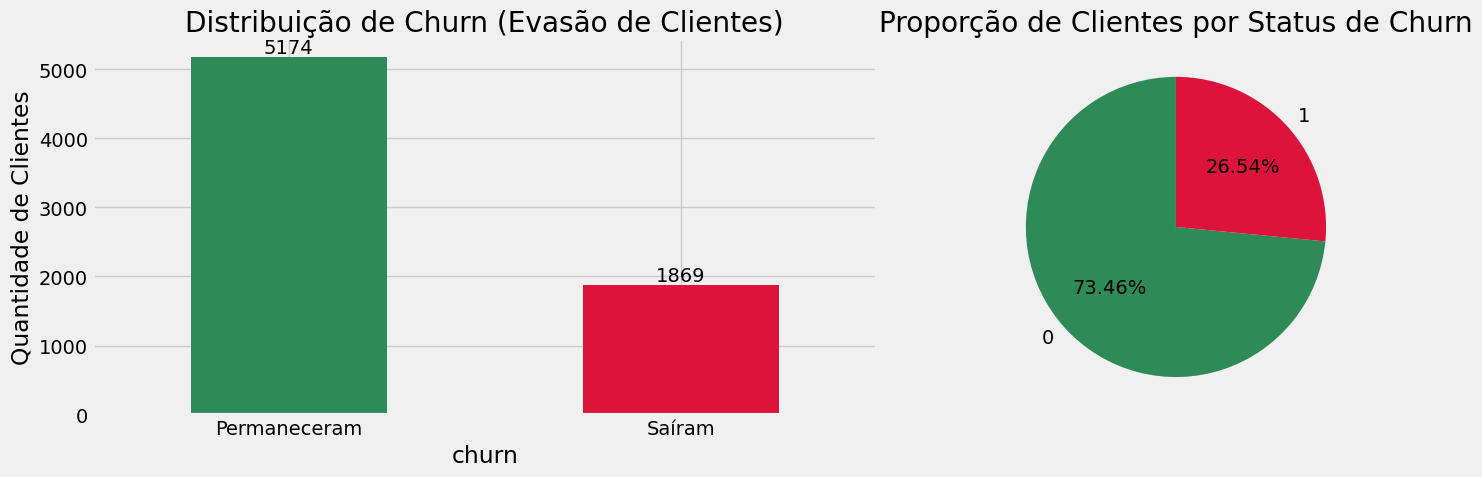

In [53]:
# Contagem dos valores de churn (removendo nulos para visualiza√ß√£o)
contagem_churn = df['churn'].dropna().value_counts()

# Cores personalizadas
cores = ['#2E8B57', '#DC143C']  # verde para 0 (permaneceu), vermelho para 1 (saiu)

# Criar subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gr√°fico de barras
contagem_churn.plot(kind='bar', color=cores, ax=axes[0])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Permaneceram', 'Sa√≠ram'], rotation=0)
axes[0].set_ylabel('Quantidade de Clientes')
axes[0].set_title('Distribui√ß√£o de Churn (Evas√£o de Clientes)')
# Adicionar r√≥tulos de dados ao gr√°fico de barras
for i, v in enumerate(contagem_churn):
    axes[0].text(i, v, str(v), ha='center', va='bottom')

# Gr√°fico de pizza
contagem_churn.plot(kind='pie', autopct='%.2f%%', colors=cores, startangle=90, ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Propor√ß√£o de Clientes por Status de Churn')

# Ajustar layout
plt.tight_layout()
plt.show()


In [26]:
# Cria um dataframe s√≥ com clientes que deram churn = 1

df_churned = df[df['churn'] == 1]
df_churned.head()

id_cliente  churn  genero  cidadao_senior  parceiro  dependentes  \
2   0004-TLHLJ      1    Male               0         0            0   
3   0011-IGKFF      1    Male               1         1            0   
4   0013-EXCHZ      1  Female               1         1            0   
18  0022-TCJCI      1    Male               1         0            0   
19  0023-HGHWL      1    Male               1         0            0   

    tempo_de_contrato  servico_telefone  multiplas_linhas servico_internet  \
2                   4                 1                 0      Fiber optic   
3                  13                 1                 0      Fiber optic   
4                   3                 1                 0      Fiber optic   
18                 45                 1                 0              DSL   
19                  1                 0              <NA>              DSL   

    ...  backup_online  protecao_dispositivo  suporte_tecnico  streaming_tv  \
2   ...              0                     1                0             0   
3   ...              1                     1                0             1   
4   ...              0                     0                1             1   
18  ...              0                     1                0             0   
19  ...              0                     0                0             0   

    streaming_filmes        contrato fatura_sem_papel  \
2                  0  Month-to-month                1   
3                  1  Month-to-month                1   
4                  0  Month-to-month                1   
18                 1        One year                0   
19                 0  Month-to-month                1   

           metodo_pagamento total_servicos_mes  total_gasto  
2          Electronic check               73.9       280.85  
3          Electronic check               98.0      1237.85  
4              Mailed check               83.9       267.40  
18  Credit card (automatic)               62.7      2791.50  
19         Electronic check               25.1        25.10  

[5 rows x 21 columns]

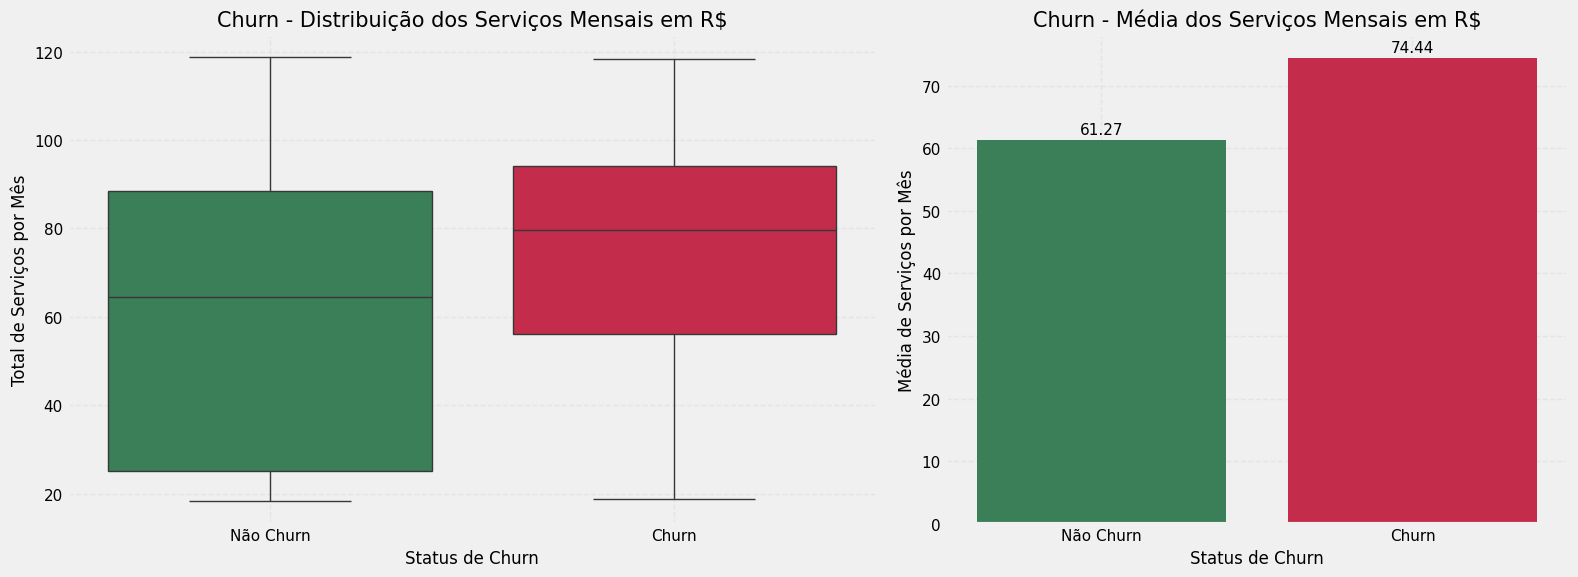

In [94]:
# Vis√£o do gasto mensal dos clientes churn = 1 e churn=0

gasto_mensal_medio_churn = df.groupby('churn')['total_servicos_mes'].mean().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1.3, 1]})

# -------- Gr√°fico 1: Boxplot --------
sns.boxplot(
    x='churn',
    y='total_servicos_mes',
    data=df,
    ax=axes[0],
    palette=['#2E8B57', '#DC143C']
)
axes[0].set_title('Churn - Distribui√ß√£o dos Servi√ßos Mensais em R$', fontsize=15)
axes[0].set_xlabel('Status de Churn', fontsize=12)
axes[0].set_ylabel('Total de Servi√ßos por M√™s', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['N√£o Churn', 'Churn'])
axes[0].tick_params(labelsize=11)
axes[0].grid(True, linestyle='--', alpha=0.3)

# -------- Gr√°fico 2: Barplot da m√©dia --------
sns.barplot(
    x='churn',
    y='total_servicos_mes',
    data=gasto_mensal_medio_churn,
    ax=axes[1],
    palette=['#2E8B57', '#DC143C']
)
axes[1].set_title('Churn - M√©dia dos Servi√ßos Mensais em R$', fontsize=15)
axes[1].set_xlabel('Status de Churn', fontsize=12)
axes[1].set_ylabel('M√©dia de Servi√ßos por M√™s', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['N√£o Churn', 'Churn'])
axes[1].tick_params(labelsize=11)
axes[1].grid(True, linestyle='--', alpha=0.3)

# R√≥tulos no topo das barras
for index, row in gasto_mensal_medio_churn.iterrows():
    axes[1].text(index, row['total_servicos_mes'] + 1,
                 round(row['total_servicos_mes'], 2),
                 color='black', ha='center', fontsize=11)

plt.tight_layout()
plt.show()




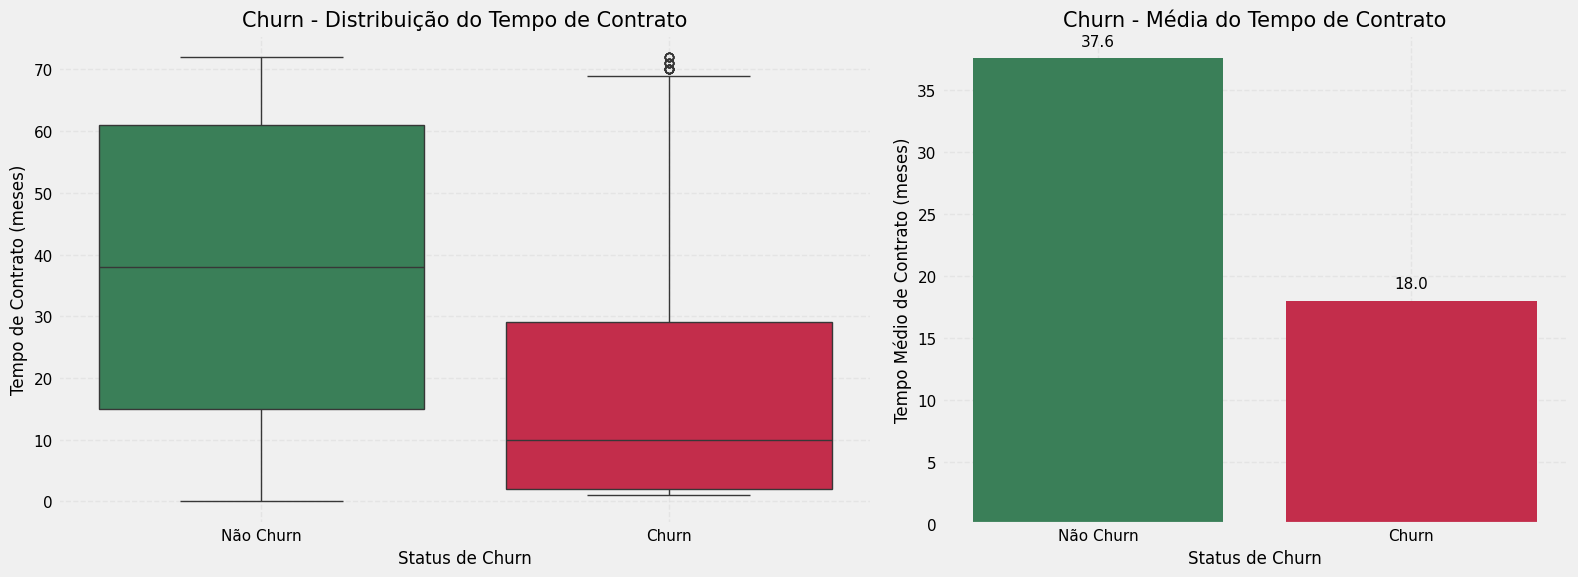

In [54]:
# Vis√£o da evas√£o pelo tempo de contrato

# Calcular a m√©dia do tempo de contrato por status de churn
tempo_medio_churn = df.groupby('churn')['tempo_de_contrato'].mean().reset_index()

# Criar subplots com dois gr√°ficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1.3, 1]})

# -------- Gr√°fico 1: Boxplot --------
sns.boxplot(
    x='churn',
    y='tempo_de_contrato',
    data=df,
    ax=axes[0],
    palette=['#2E8B57', '#DC143C']
)
axes[0].set_title('Churn - Distribui√ß√£o do Tempo de Contrato', fontsize=15)
axes[0].set_xlabel('Status de Churn', fontsize=12)
axes[0].set_ylabel('Tempo de Contrato (meses)', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['N√£o Churn', 'Churn'])
axes[0].tick_params(labelsize=11)
axes[0].grid(True, linestyle='--', alpha=0.3)

# -------- Gr√°fico 2: Barplot da m√©dia --------
sns.barplot(
    x='churn',
    y='tempo_de_contrato',
    data=tempo_medio_churn,
    ax=axes[1],
    palette=['#2E8B57', '#DC143C']
)
axes[1].set_title('Churn - M√©dia do Tempo de Contrato', fontsize=15)
axes[1].set_xlabel('Status de Churn', fontsize=12)
axes[1].set_ylabel('Tempo M√©dio de Contrato (meses)', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['N√£o Churn', 'Churn'])
axes[1].tick_params(labelsize=11)
axes[1].grid(True, linestyle='--', alpha=0.3)

# R√≥tulos no topo das barras
for index, row in tempo_medio_churn.iterrows():
    axes[1].text(index, row['tempo_de_contrato'] + 1,
                 round(row['tempo_de_contrato'], 1),
                 color='black', ha='center', fontsize=11)

plt.tight_layout()
plt.show()


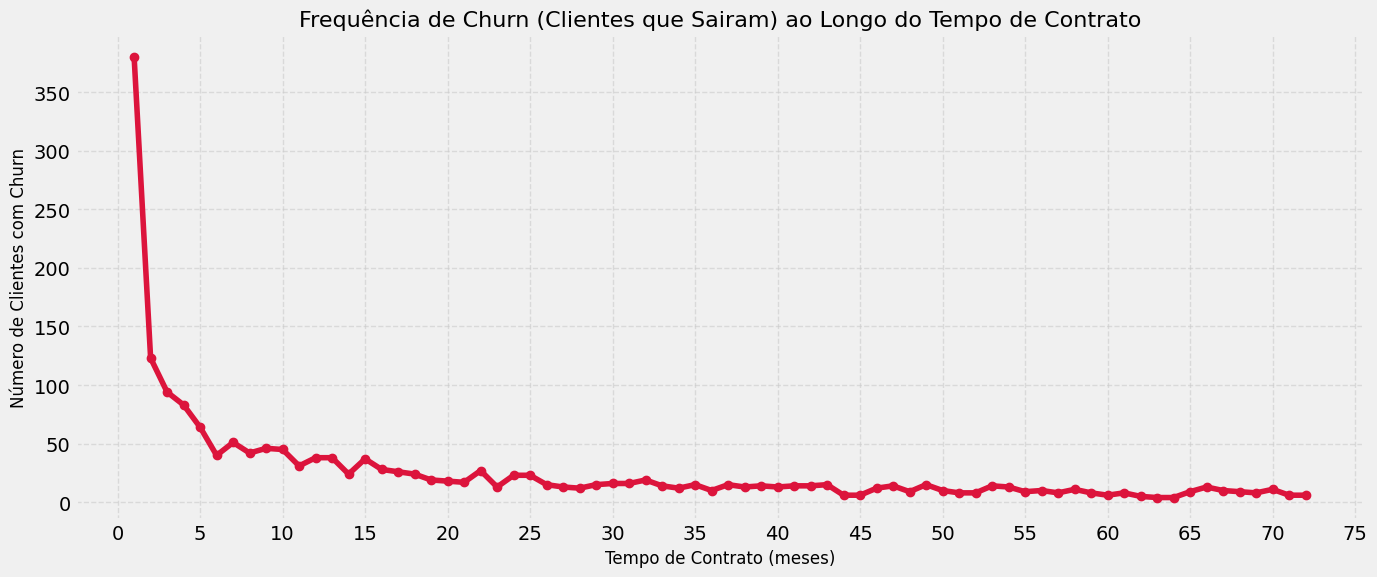

In [55]:
# Vis√£o ao longo do tempo de churn =1 pelo Tempo de Contrato

churn_por_tempo = df[df['churn'] == 1]['tempo_de_contrato'].value_counts().sort_index()
plt.figure(figsize=(14, 6))
churn_por_tempo.plot(kind='line', marker='o', linestyle='-', color='#DC143C')
plt.title('Frequ√™ncia de Churn (Clientes que Sairam) ao Longo do Tempo de Contrato', fontsize=16)
plt.xlabel('Tempo de Contrato (meses)', fontsize=12)
plt.ylabel('N√∫mero de Clientes com Churn', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, df['tempo_de_contrato'].max() + 5, 5)) # Define os ticks do eixo x a cada 5 meses
plt.tight_layout()
plt.show()

### An√°lise por categoria

In [27]:
# Vis√£o por genero

genero_churn = df_churned.groupby('genero')['churn'].sum()
genero_churn

genero
Female    939
Male      930
Name: churn, dtype: Int64

In [29]:
# Vis√£o por genero

genero_churn = df_churned.groupby('genero')['churn'].sum()
genero_churn

genero
Female    939
Male      930
Name: churn, dtype: Int64

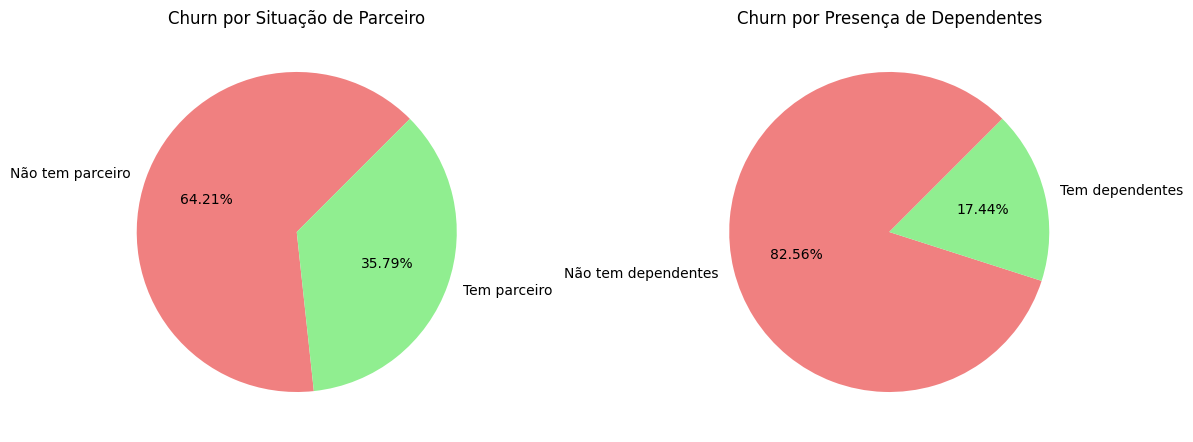

In [35]:
# Vis√£o por familia

parceiro_churn = df_churned.groupby('parceiro')['churn'].count()
dependentes_churn = df_churned.groupby('dependentes')['churn'].count()

# Criar figura com 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pizza: parceiro
axes[0].pie(
    parceiro_churn,
    labels=['N√£o tem parceiro', 'Tem parceiro'],
    autopct='%.2f%%',
    startangle=45,
    colors=['#F08080', '#90EE90']
)
axes[0].set_title('Churn por Situa√ß√£o de Parceiro')

# Pizza: dependentes
axes[1].pie(
    dependentes_churn,
    labels=['N√£o tem dependentes', 'Tem dependentes'],
    autopct='%.2f%%',
    startangle=45,
    colors=['#F08080', '#90EE90']
)
axes[1].set_title('Churn por Presen√ßa de Dependentes')

plt.tight_layout()
plt.show()

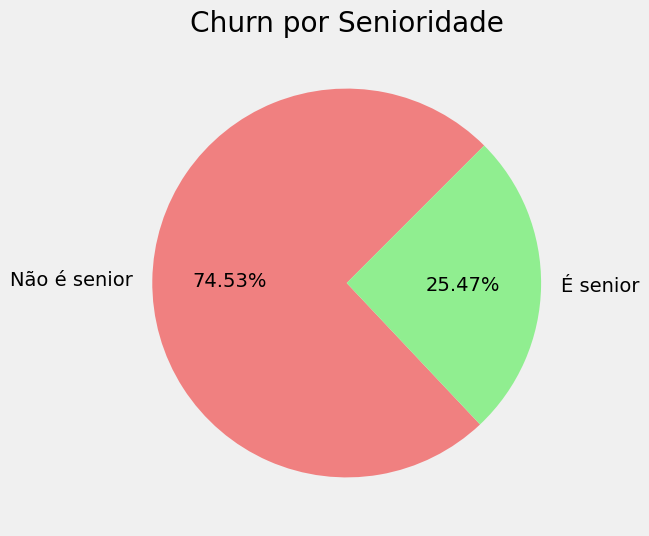

In [39]:
# Vis√£o por senioridade

# Agrupa os clientes que cancelaram (churn = 1) por senioridade
senior_churn = df_churned['cidadao_senior'].value_counts().sort_index()

# Mapeia os r√≥tulos corretos com base no √≠ndice
labels = senior_churn.index.map({0: 'N√£o √© senior', 1: '√â senior'})

# Plot com estilo fivethirtyeight
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8, 6))
    plt.pie(
        senior_churn,
        labels=labels,
        autopct='%.2f%%',
        startangle=45,
        colors=['#F08080', '#90EE90']
    )
    plt.title('Churn por Senioridade')
    plt.show()


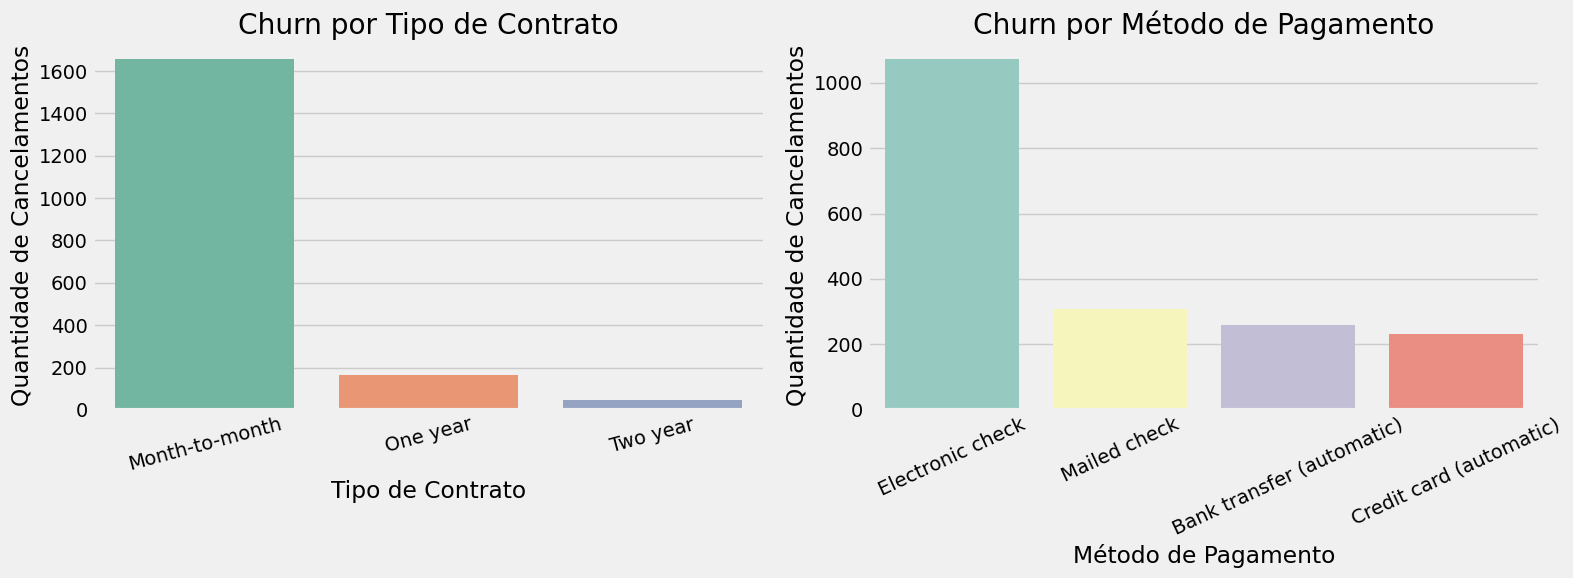

In [40]:
# Vis√£o por tipo de contrato e formas de pagamento
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# -------- Gr√°fico de barras: Tipo de contrato --------
contrato_churn = df_churned['contrato'].value_counts()

sns.barplot(
    x=contrato_churn.index,
    y=contrato_churn.values,
    ax=axes[0],
    palette='Set2'
)
axes[0].set_title('Churn por Tipo de Contrato')
axes[0].set_ylabel('Quantidade de Cancelamentos')
axes[0].set_xlabel('Tipo de Contrato')
axes[0].tick_params(axis='x', rotation=15)

# -------- Gr√°fico de barras: M√©todo de pagamento --------
pagamento_churn = df_churned['metodo_pagamento'].value_counts()

sns.barplot(
    x=pagamento_churn.index,
    y=pagamento_churn.values,
    ax=axes[1],
    palette='Set3'
)
axes[1].set_title('Churn por M√©todo de Pagamento')
axes[1].set_ylabel('Quantidade de Cancelamentos')
axes[1].set_xlabel('M√©todo de Pagamento')
axes[1].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()

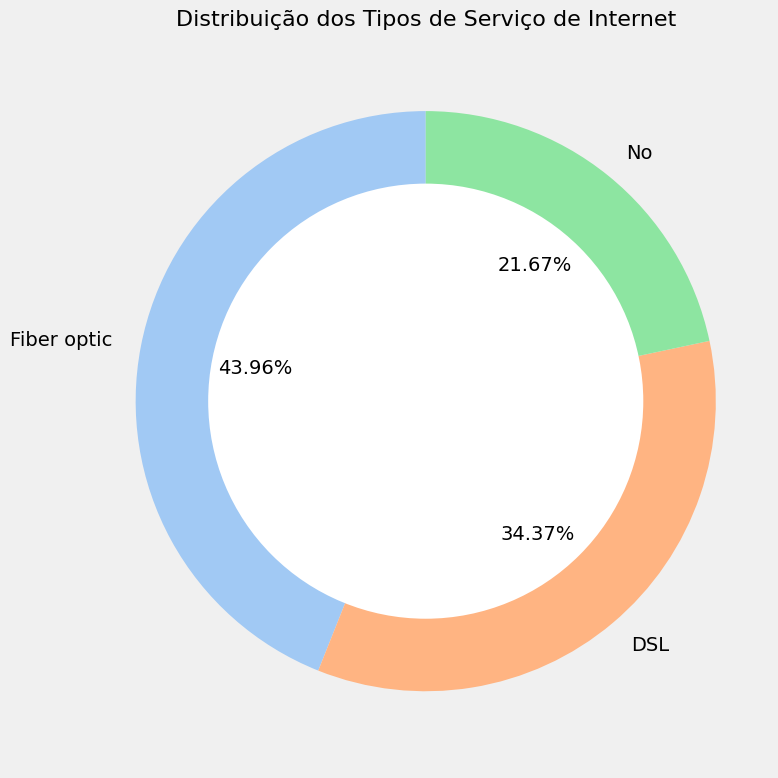

In [58]:
# Vis√£o pelo tipo de internet contratada

# Agrupar e contar a frequ√™ncia de cada tipo de servi√ßo de internet
servico_internet_counts = df['servico_internet'].value_counts().reset_index()
servico_internet_counts.columns = ['Servi√ßo de Internet', 'Quantidade']

# Definir cores para o gr√°fico
colors = sns.color_palette('pastel')[0:len(servico_internet_counts)]

# Criar o gr√°fico de rosca
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(servico_internet_counts['Quantidade'], labels=servico_internet_counts['Servi√ßo de Internet'], autopct='%.2f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adicionar t√≠tulo
plt.title('Distribui√ß√£o dos Tipos de Servi√ßo de Internet', fontsize=16)
ax.axis('equal')
plt.tight_layout()
plt.show()

In [70]:
df['multiplas_linhas'].unique()

<IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64

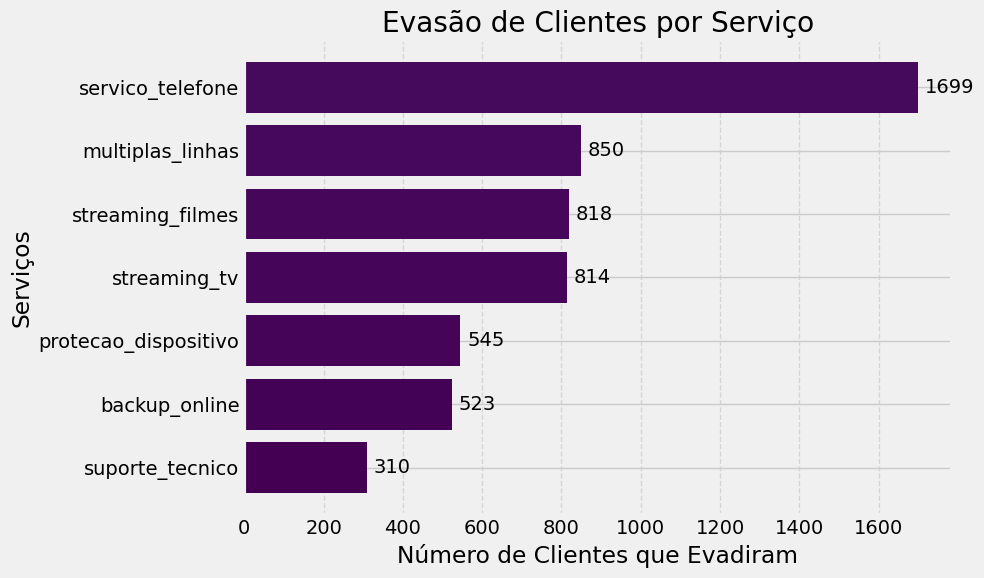

In [72]:
# Vis√£o pelos servi√ßos servidos
servicos = ['multiplas_linhas', 'servico_telefone',
            'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
            'streaming_tv', 'streaming_filmes']

df_churned = df_churned.copy()
for col in servicos:
    df_churned[col] = pd.to_numeric(df_churned[col], errors='coerce').fillna(0)

evasao_por_servico = df_churned[servicos].sum().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(evasao_por_servico.index, evasao_por_servico.values, color=plt.cm.viridis(range(len(evasao_por_servico))))

plt.title('Evas√£o de Clientes por Servi√ßo')
plt.xlabel('N√∫mero de Clientes que Evadiram')
plt.ylabel('Servi√ßos')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionar valores ao lado das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(evasao_por_servico.values)*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center')

plt.tight_layout()
plt.show()


In [74]:
corr = df.corr(numeric_only=True)
print(corr['churn'].sort_values(ascending=False))

churn                   1.000000
total_servicos_mes      0.193356
fatura_sem_papel        0.191825
cidadao_senior          0.150889
multiplas_linhas        0.040207
servico_telefone        0.011942
streaming_tv           -0.037057
streaming_filmes       -0.040132
parceiro               -0.150448
dependentes            -0.164221
protecao_dispositivo   -0.177125
backup_online          -0.196061
total_gasto            -0.199484
suporte_tecnico        -0.274422
seguranca_online       -0.280816
tempo_de_contrato      -0.352229
Name: churn, dtype: float64


Contratos longos + servi√ßos de prote√ß√£o (backup, seguran√ßa online, suporte t√©cnico) ajudam a reduzir churn.

Clientes mais idosos e que usam fatura digital t√™m mais propens√£o a sair.

O gasto total e dependentes/partner indicam maior fidelidade.

Streaming e telefone quase n√£o influenciam no churn.

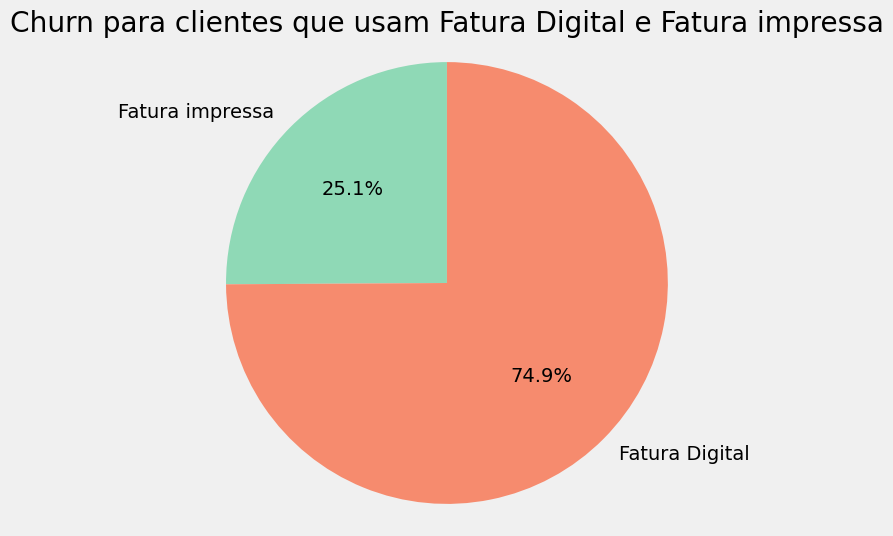

In [92]:
# Contagem dos churned por fatura sem papel
contagem_paperless = df_churned['fatura_sem_papel'].value_counts().sort_index()

labels = ['Fatura impressa', 'Fatura Digital']

plt.figure(figsize=(6,6))
plt.pie(contagem_paperless, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#8fd9b6','#f68b6e'])
plt.title('Churn para clientes que usam Fatura Digital e Fatura impressa')
plt.axis('equal')
plt.show()


#üìÑRelatorio Final

## **Objetivo do Projeto:**

O principal objetivo do projeto "Churn de Clientes" da Telecom X √© entender os fatores que levam √† perda de clientes, identificar o perfil dos clientes que evadem e propor estrat√©gias para reter os clientes atuais e melhorar a qualidade do servi√ßo.

**Cen√°rio Atual de Churn:**

A Telecom X enfrenta uma taxa de churn significativa: 26.54% dos seus clientes evadiram. O que refor√ßa a import√¢ncia para tomadas de decis√µes com objetivo de mitigar essa perda.

## **Perfil dos clientes que deram Churn**

### **1. Clientes novos**

O churn √© extremamente elevado nos primeiros meses de contrato, com um pico significativo logo no primeiro m√™s. A m√©dia de tempo de contrato para clientes que churnam √© de apenas 18 meses, comparado a 37.6 meses para clientes que permanecem.

### **2. Contratos Mensais**

A maioria dos cancelamentos (mais de 1600) prov√©m de clientes com contratos mensais, que representam a maior parte da base de clientes. Contratos de um ou dois anos t√™m um volume de churn muito baixo. Contratos mensais tornam a sa√≠da do cliente mais f√°cil.

### **3. M√©todo de Pagamento "Cheque Eletr√¥nico":**

Clientes que utilizam cheque eletr√¥nico como forma de pagamento s√£o os que mais churnam (mais de 1000 cancelamentos).
Podemos dizer que esse m√©todo de pagamento est√° fortemente correlacionado com a evas√£o.

### **4. Fatura Digital (Fatura sem Papel):**

Clientes que optam pela fatura digital (fatura_sem_papel) t√™m maior propens√£o ao churn. Cerca de 75% dos churns s√£o de clientes com fatura digital.


### **5. Alto Gasto Mensal:**

Clientes que churnam tendem a ter um gasto mensal m√©dio ligeiramente maior
(Rs 74,44)  do que os que permanecem (Rs 61,27).
Clientes que pagam mais podem ter expectativas de servi√ßo mais elevadas e, se n√£o forem atendidas, a frustra√ß√£o pode ser maior.

###**6. Aus√™ncia de Servi√ßos de Seguran√ßa e Suporte:**

A correla√ß√£o mostra que clientes que possuem seguranca online e suporte tecnico t√™m significativamente menor probabilidade de churn.
Ent√£o podemos dizer que estes servi√ßos adicionais atuam como fortes fatores de reten√ß√£o.

### **7. Clientes Sem Parceiro e/ou Dependentes:**

A maioria dos clientes que churnam n√£o possui parceiro (64.21%) ou dependentes (82.56%). Clientes com familias podem buscar maior estabilidade ou se beneficiar de planos mais vantajosos que incentivam a perman√™ncia.

### **8. Cidad√£os Seniores:**

Proporcionalmente, cidad√£os seniores s√£o mais propensos a churnar (25.47% dos churns s√£o de seniores, enquanto eles representam 16.21% da base total).
Este segmento pode ter necessidades espec√≠ficas de atendimento ou suporte que n√£o est√£o sendo totalmente supridas.

### **Fatores com Impacto Menor:**

G√™nero, servi√ßo de telefone e servi√ßos de streaming (TV e Filmes) n√£o mostraram ser fatores significativos de churn por si s√≥.


## **Recomenda√ß√µes de a√ß√µes**

**1. Programa de Onboarding e Engajamento Proativo (Foco nos Primeiros Meses):**

A√ß√£o: Implementar um programa intensivo de contato nos primeiros 90 dias de contrato. Isso pode incluir liga√ß√µes de boas-vindas, acompanhamento da ativa√ß√£o do servi√ßo, canais de suporte dedicados para "novos clientes" e pesquisas de satisfa√ß√£o proativas para identificar e resolver problemas rapidamente.
Objetivo: Reduzir o churn de clientes rec√©m-adquiridos.



**2. Incentivo √† Fideliza√ß√£o com Contratos Mais Longos:**

A√ß√£o: Desenvolver ofertas e campanhas atraentes para converter clientes de contrato mensal em planos de 1 ou 2 anos. Oferecer descontos na mensalidade, servi√ßos adicionais gratuitos por um per√≠odo, ou upgrades de planos para quem optar por contratos mais longos.
Objetivo: Aumentar a barreira de sa√≠da e a lealdade do cliente.



**3. Otimiza√ß√£o e An√°lise do M√©todo de Pagamento "Cheque Eletr√¥nico":**

A√ß√£o: Realizar uma investiga√ß√£o aprofundada sobre a experi√™ncia de clientes que usam cheque eletr√¥nico. Pode ser necess√°rio simplificar o processo, oferecer suporte mais robusto para este m√©todo, ou incentivar a migra√ß√£o para m√©todos de pagamento autom√°ticos (d√©bito em conta/cart√£o de cr√©dito) com pequenos b√¥nus ou descontos.
Objetivo: Eliminar atritos no processo de pagamento que levam ao churn.



**4. Aprimoramento da Experi√™ncia da Fatura Digital e Engajamento Online:**

A√ß√£o: Garantir que o portal do cliente e o aplicativo sejam intuitivos, funcionais e ofere√ßam valor agregado al√©m da fatura (ex: consumo detalhado, dicas de otimiza√ß√£o, ofertas personalizadas). Desenvolver estrat√©gias de comunica√ß√£o e engajamento que mantenham esses clientes conectados √† marca no ambiente digital.
Objetivo: Transformar a fatura digital de um fator de risco em um canal de fideliza√ß√£o.



**5. Gest√£o de Expectativas e Valor para Clientes de Alto Gasto Mensal:**

A√ß√£o: Garantir que os clientes com planos de maior valor recebam um servi√ßo e um suporte que justifiquem o investimento. Isso pode envolver atendimento priorit√°rio, monitoramento proativo de desempenho do servi√ßo e comunica√ß√£o transparente sobre os benef√≠cios premium de seus pacotes.
Objetivo: Alinhar o valor percebido com o pre√ßo pago e reduzir a insatisfa√ß√£o.



**6. Promo√ß√£o Intensiva de Servi√ßos de Seguran√ßa Online e Suporte T√©cnico:**

A√ß√£o: Posicionar seguranca online e suporte tecnico como diferenciais de reten√ß√£o. Oferecer esses servi√ßos como parte de pacotes, ou com promo√ß√µes atrativas, especialmente para novos clientes. Educar os clientes sobre o valor e a tranquilidade que esses servi√ßos proporcionam.
Objetivo: Aumentar a ades√£o a servi√ßos que comprovadamente ret√™m clientes.


**7. Segmenta√ß√£o e Ofertas Direcionadas:**

A√ß√£o: Criar campanhas e planos espec√≠ficos para segmentos mais vulner√°veis, como clientes sem parceiro/dependentes e cidad√£os seniores, levando em conta suas necessidades e comportamentos. Para seniores, garantir canais de atendimento mais acess√≠veis e um suporte que priorize a clareza e a paci√™ncia.
Objetivo: Atender √†s particularidades de cada grupo e aumentar sua satisfa√ß√£o.